In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tqdm import tqdm
import random
import keras
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
face_cascade = cv2.Cascademodel('haarcascade_frontalface_default.xml')

path = "C:/Users/moveon/AIWORKS/covid19/orj_dataset"
new_path = "C:/Users/moveon/AIWORKS/covid19/new_imgs"
dirs = os.listdir(path)
i = 0
for file in dirs:
    print(file)
    img_path = os.path.join(path, file)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.4, 5)
    for (x, y, w, h) in faces:
            r = max(w, h) / 2
            centerx = x + w / 2
            centery = y + h / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)
            faceimg = img[ny:ny+nr, nx:nx+nr]
            i += 1
            cv2.imwrite(new_path +"/image%d.jpg" % i, faceimg)

In [2]:
from shutil import copyfile

In [ ]:
path = "C:/Users/moveon/AIWORKS/covid19/Real-World-Masked-Face-Dataset-master/RWMFD_part_1"
new_path = "C:/Users/moveon/AIWORKS/covid19/Real-World-Masked-Face-Dataset-master/masked_imgs_2"
dirs = os.listdir(path)
for file in dirs:
    print(file)
    subdirs = os.listdir(os.path.join(path, file))
    #print(subdirs)
    for img_files in subdirs:
        #print(img_files)
        src = os.path.join(path, file, img_files)
        dst = os.path.join(new_path, file+img_files)
        #print(dst)
        copyfile(src, dst)
    #print(subdirs)
    #print(os.listdir(os.path.join(path, file)))
    

In [34]:
DATADIR = "C:/Users/moveon/AIWORKS/covid19/masked_dataset"

CATEGORIES = ["masked", "not_masked"]

In [2]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)        

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(DATADIR + '/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(DATADIR + '/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2896 images belonging to 2 classes.
Found 720 images belonging to 2 classes.


In [5]:
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit_generator(training_set,
                         steps_per_epoch = 2896,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 720,
                         callbacks = [checkpoint])
print(history.history.keys())


Epoch 1/3
2896/2896 [==============================] - 207s 72ms/step - loss: 0.0466 - accuracy: 0.9833 - val_loss: 0.0010 - val_accuracy: 0.9917

Epoch 00001: val_accuracy improved from -inf to 0.99171, saving model to best_model.hdf5
Epoch 2/3
2896/2896 [==============================] - 202s 70ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 5.2954e-04 - val_accuracy: 0.9958

Epoch 00002: val_accuracy improved from 0.99171 to 0.99579, saving model to best_model.hdf5
Epoch 3/3
2896/2896 [==============================] - 198s 68ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0026 - val_accuracy: 0.9986

Epoch 00003: val_accuracy improved from 0.99579 to 0.99858, saving model to best_model.hdf5
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


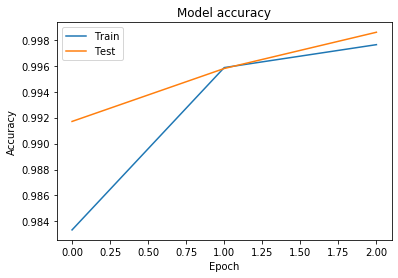

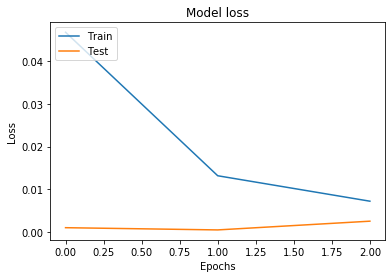

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [2]:
model = load_model("best_model.hdf5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [3]:
face_cascade = cv2.Cascademodel('haarcascade_frontalface_default.xml')

aaa
[[1.]]
not_masked


True

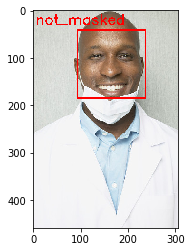

In [6]:
test_images_path = 'C:/Users/moveon/AIWORKS/covid19/masked_dataset/test_images'
image_name = '3.jpg'

img = cv2.imread(os.path.join(test_images_path, image_name))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 3)
faceimg = 0
for (x, y, w, h) in faces:
    r = max(w, h) / 2
    centerx = x + w / 2
    centery = y + h / 2
    nx = int(centerx - r)
    ny = int(centery - r)
    nr = int(r * 2)
    faceimg = img[ny:ny + nr, nx:nx + nr]
if np.shape(faceimg) != ():
    resized_img = cv2.resize(faceimg, (64, 64))
    test_image = image.img_to_array(resized_img)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    print(result)
    for (x, y, w, h) in faces:
        if result[0][0] == 1:
            prediction = 'not_masked'
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(img, str(prediction), (5, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        else:
            prediction = 'masked'
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, str(prediction), (5, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    print(prediction)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.imwrite("a.jpg", img)

aaa
[[0.]]
masked


True

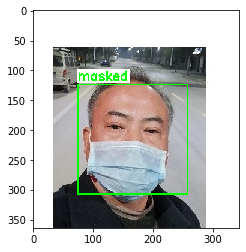

In [39]:
test_images_path = 'C:/Users/moveon/AIWORKS/covid19/masked_dataset/test_images'
image_name = '4.jpg'

img = cv2.imread(os.path.join(test_images_path, image_name))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 3)
faceimg = 0
for (x, y, w, h) in faces:
    r = max(w, h) / 2
    centerx = x + w / 2
    centery = y + h / 2
    nx = int(centerx - r)
    ny = int(centery - r)
    nr = int(r * 2)
    faceimg = img[ny:ny + nr, nx:nx + nr]
if np.shape(faceimg) != ():
    resized_img = cv2.resize(faceimg, (64, 64))
    test_image = image.img_to_array(resized_img)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    print(result)
    for (x, y, w, h) in faces:
        if result[0][0] == 1:
            prediction = 'not_masked'
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            label = '%s' % (prediction)
            labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
            label_ymin = max(y, labelSize[1] + 10)
            cv2.rectangle(img, (x, label_ymin - labelSize[1] - 10),
                          (x + labelSize[0], label_ymin + baseLine - 10), (255, 255, 255),
                          cv2.FILLED)
            cv2.putText(img, label, (x, label_ymin - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255),2)
        else:
            prediction = 'masked'
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            label = '%s' % (prediction)
            labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
            label_ymin = max(y, labelSize[1] + 10)
            cv2.rectangle(img, (x, label_ymin - labelSize[1] - 10),
                          (x + labelSize[0], label_ymin + baseLine - 10), (255, 255, 255),
                          cv2.FILLED)
            cv2.putText(img, label, (x, label_ymin - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0),2)
    print(prediction)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# img = cv2.resize(img, (300,200))
cv2.imwrite(image_name, img)